<a href="https://colab.research.google.com/github/derrodo61/notebooks/blob/main/diffusers_effective.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**More efficiency by:**

- using float16
- pipeline.to("cuda")
- use a more effective scheduler
- reduce number of inference steps


In [ ]:
!pip install diffusers torch

In [ ]:
from diffusers import DiffusionPipeline
import torch

#model_id = "runwayml/stable-diffusion-v1-5"
model_id = "SG161222/Realistic_Vision_V6.0_B1_noVAE"

pipeline = DiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    use_safetensors=False,
    safety_checker = None,
    requires_safety_checker = False
    )
pipeline = pipeline.to("cuda")

In [19]:
from diffusers import DPMSolverMultistepScheduler

pipeline.scheduler = DPMSolverMultistepScheduler.from_config(pipeline.scheduler.config)

  0%|          | 0/20 [00:00<?, ?it/s]

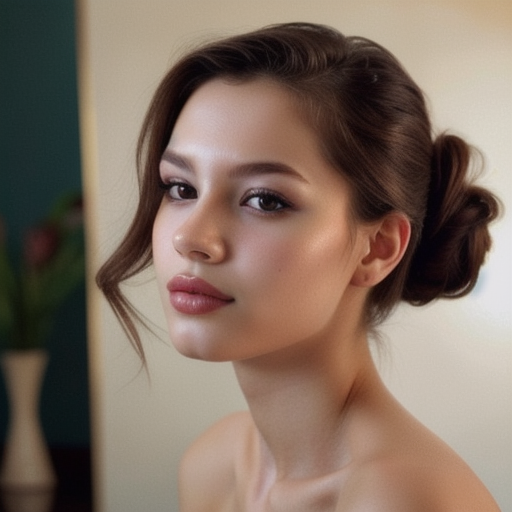

In [25]:
prompt = "esthetic portrait of an beautiful woman"
generator = torch.Generator("cuda").manual_seed(0)
image = pipeline(prompt, generator=generator, num_inference_steps=20).images[0]
image

In [26]:
# show valid schedulers for this pipeline
pipeline.scheduler.compatibles

[diffusers.schedulers.scheduling_k_dpm_2_ancestral_discrete.KDPM2AncestralDiscreteScheduler,
 diffusers.schedulers.scheduling_ddim.DDIMScheduler,
 diffusers.schedulers.scheduling_edm_euler.EDMEulerScheduler,
 diffusers.schedulers.scheduling_deis_multistep.DEISMultistepScheduler,
 diffusers.schedulers.scheduling_unipc_multistep.UniPCMultistepScheduler,
 diffusers.schedulers.scheduling_pndm.PNDMScheduler,
 diffusers.schedulers.scheduling_euler_ancestral_discrete.EulerAncestralDiscreteScheduler,
 diffusers.schedulers.scheduling_heun_discrete.HeunDiscreteScheduler,
 diffusers.schedulers.scheduling_dpmsolver_multistep.DPMSolverMultistepScheduler,
 diffusers.schedulers.scheduling_lms_discrete.LMSDiscreteScheduler,
 diffusers.utils.dummy_torch_and_torchsde_objects.DPMSolverSDEScheduler,
 diffusers.schedulers.scheduling_ddpm.DDPMScheduler,
 diffusers.schedulers.scheduling_euler_discrete.EulerDiscreteScheduler,
 diffusers.schedulers.scheduling_k_dpm_2_discrete.KDPM2DiscreteScheduler,
 diffusers